### The Idea of SVM's.

In classification problems, we often treat data as a $k$-dimensional vector, each of a given class, and we search for a $k-1$ dimensional hyperplane that seperates the points into their respective classes.  However, this hyperplane is almost never unique.

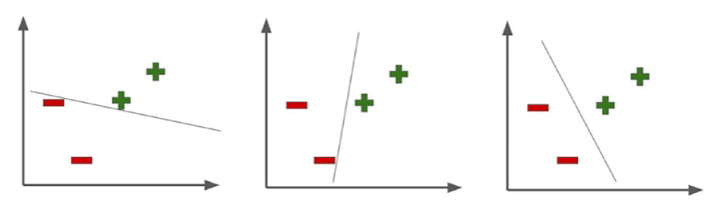 [2]

On the left image below, we see clearly why not every seperating hyperplane is built equally. They are far too sensitive. The same goes for the dashed lines on the right - they are too sensitive again. SVM's try find the optimal hyperplane by maximising the distance between *support vectors* - these are the points right on the "edge" of the dataset, closest to the seperating hyperplane. In the image above, they are highlighted in red. This also means that adding datapoints away from the support vectors will not affect the hyperplane.

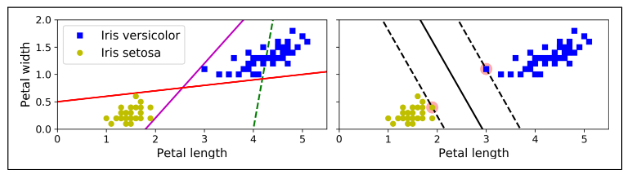 [1]

Suppose we are given a linearly seperable (meaning a seperating hyperplane exists) training dataset of n points of the form $(\textbf{x}_1, y_1),...,(\textbf{x}_n, y_n)$, where $\textbf{x}_i$ is a $k$-dimensional vector, and $y  = \pm 1$ gives the class. We know any hyperplane can be written as the set of $\textbf{x}$ such that $\textbf{w}^T\textbf{x} - b = 0$, where $\textbf{w}$ is the normal vector to the hyperplane.

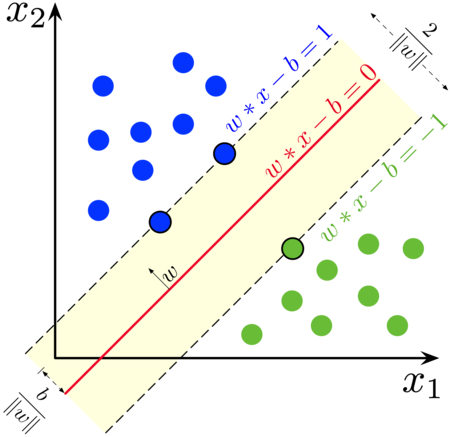

Looking at the image, we are finding the hyperplane $\textbf{w}^T\textbf{x} - b =0$ that maxmises the distance $\frac{2}{||\textbf{w}||}$ subject to each point being on the correct side of the plane. (Notice this is equivalent to minimising $\frac{1}{2} ||\textbf{w}||$). 

Notice, however, that this under this formulation of the optimisation problem, if there is an outlier in the dataset, then no classifying hyperplane can be found. This can be seen in the left image. 

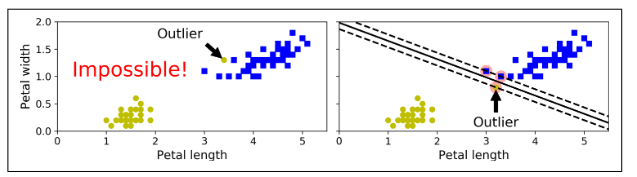

In order to have some classification when the data is not linearly seperable we introduce the *hinge loss function*, $L(\textbf{x}_i, y_i)$, which is zero if our point lies on the correct side of margin, and if not, it's value is proportional to the distance from the margin. We are then trying to minimise $\frac{1}{2}||\textbf{w}|| + C$, where $C =  \frac{1}{n} \sum_{i=1}^n L(\textbf{x}_i, y_i)$. We can decide on a maximum value of $C$ which will determine how many margin violations are allowed.

### The Linearly Seperable Case

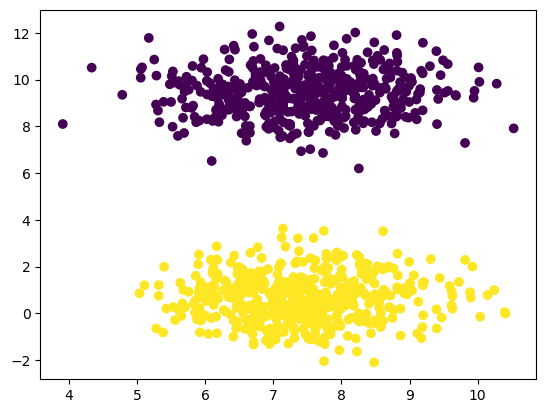

In [ ]:

#Creating a linearly seperable dataset with make_blobs

from sklearn.datasets import make_classification, make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples =1000, centers = 2)

plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

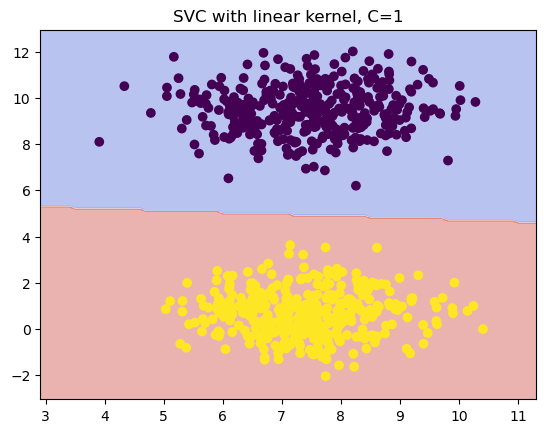

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
#Train-test split - 25% of the data is reserved for testing natively.

X_train, X_test, y_train, y_test = train_test_split(X,y)

#Training our linear SVM model - one more sensitive to outliers, one less so.

svc = svm.SVC(kernel='linear').fit(X_train,y_train)
less_sensitive_svc = svm.SVC(kernel='rbf', C=1, gamma=0.7).fit(X_train, y_train)
#Plotting our test data and the maximal seperating hyperplane.

titles = ['SVC with linear kernel, C=1', 'SVC with RBF kernel']
xx, yy = np.meshgrid(np.arange(X_train[:,0].min()-1, X_train[:,0].max()+1, 0.1), np.arange(X_train[:,1].min()-1, X_train[:,1].max()+1, 0.1))

Z=svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z, cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_train[:,0], X_train[:,1],c = y_train, marker='o')
plt.title(titles[0])
plt.show()

<Axes: >

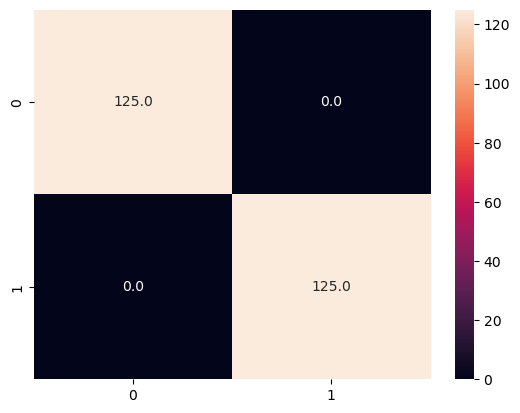

In [47]:
#The confusion matrix.

from sklearn import metrics
import seaborn as sns
y_pred = svc.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = ".1f")

#As we can see, all points are classified properly. Of course, this is an easy dataset.

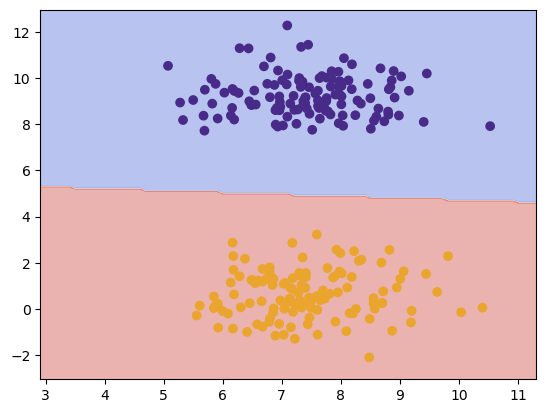

In [ ]:
#Plot of the test set: SVC is working well for the linearly seperable data.

xx, yy = np.meshgrid(np.arange(X_train[:,0].min()-1, X_train[:,0].max()+1, 0.1), np.arange(X_train[:,1].min()-1, X_train[:,1].max()+1, 0.1))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X_test[:,0], X_test[:,1],c = y_test, marker='o')
plt.contourf(xx,yy,Z, cmap=plt.cm.coolwarm, alpha=0.4)
plt.show()

In [49]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       125

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



### Non-linearly Seperable data. 

We will look at a few types of classification problems here. First of all, at a binary classification with nonlinear data, and we will see how SVM's deal with that. Then we will look at multilabel classification, in easier and harder cases, and see how SVM's deal. 

First of all, binary classification with non-linearly seperable data. 

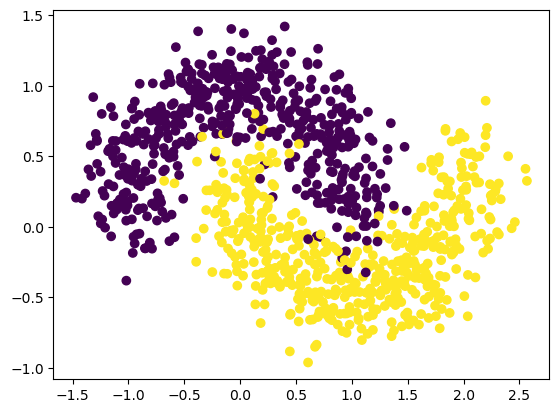

In [50]:
from sklearn.datasets import make_moons
#Creating a binary classification problem with non-linearly seperable data

X1, y1 = make_moons(1000, noise=0.2)

plt.scatter(X1[:,0], X1[:,1], c=y1)
plt.show()

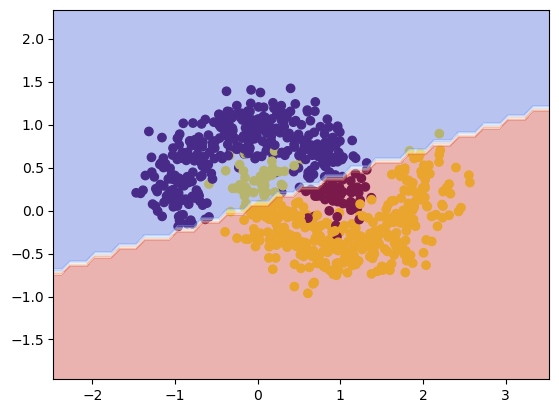

In [51]:
#How does linear SVC fare? 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1)
svm1 = svm.SVC(kernel='linear').fit(X1_train,y1_train)

xx, yy = np.meshgrid(np.arange(X1_train[:,0].min()-1, X1_train[:,0].max()+1, 0.1), np.arange(X1_train[:,1].min()-1, X1_train[:,1].max()+1, 0.1))
Z = svm1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X1_train[:,0], X1_train[:,1],c = y1_train, marker='o')
plt.contourf(xx,yy,Z, cmap=plt.cm.coolwarm, alpha=0.4)
plt.show()

#Linear SVM fares very poorly - as is to be expected, as it is trying to classify it linearly.

### The Kernel Trick

A way to classify non-linear data is to add features. Consider the diagram below.

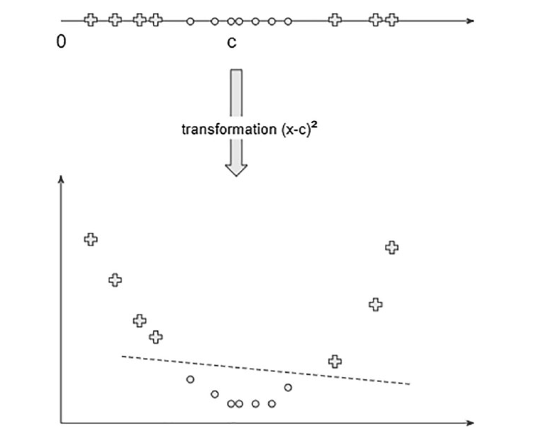
[2]

The one dimensional datset is not linearly seperable. (No one point - 0D plane) will seperate it. However, the data in 2D is linearly seperable. This is what we are doing when we change the kernel of the SVM, we are adding features. An example of a kernel, that we will use below, is the *radial basis function*, given by $k(\textbf{x}_i, \textbf{x}_j) = \exp(-\gamma||\textbf{x}_i - \textbf{x}_j||^2)$. 

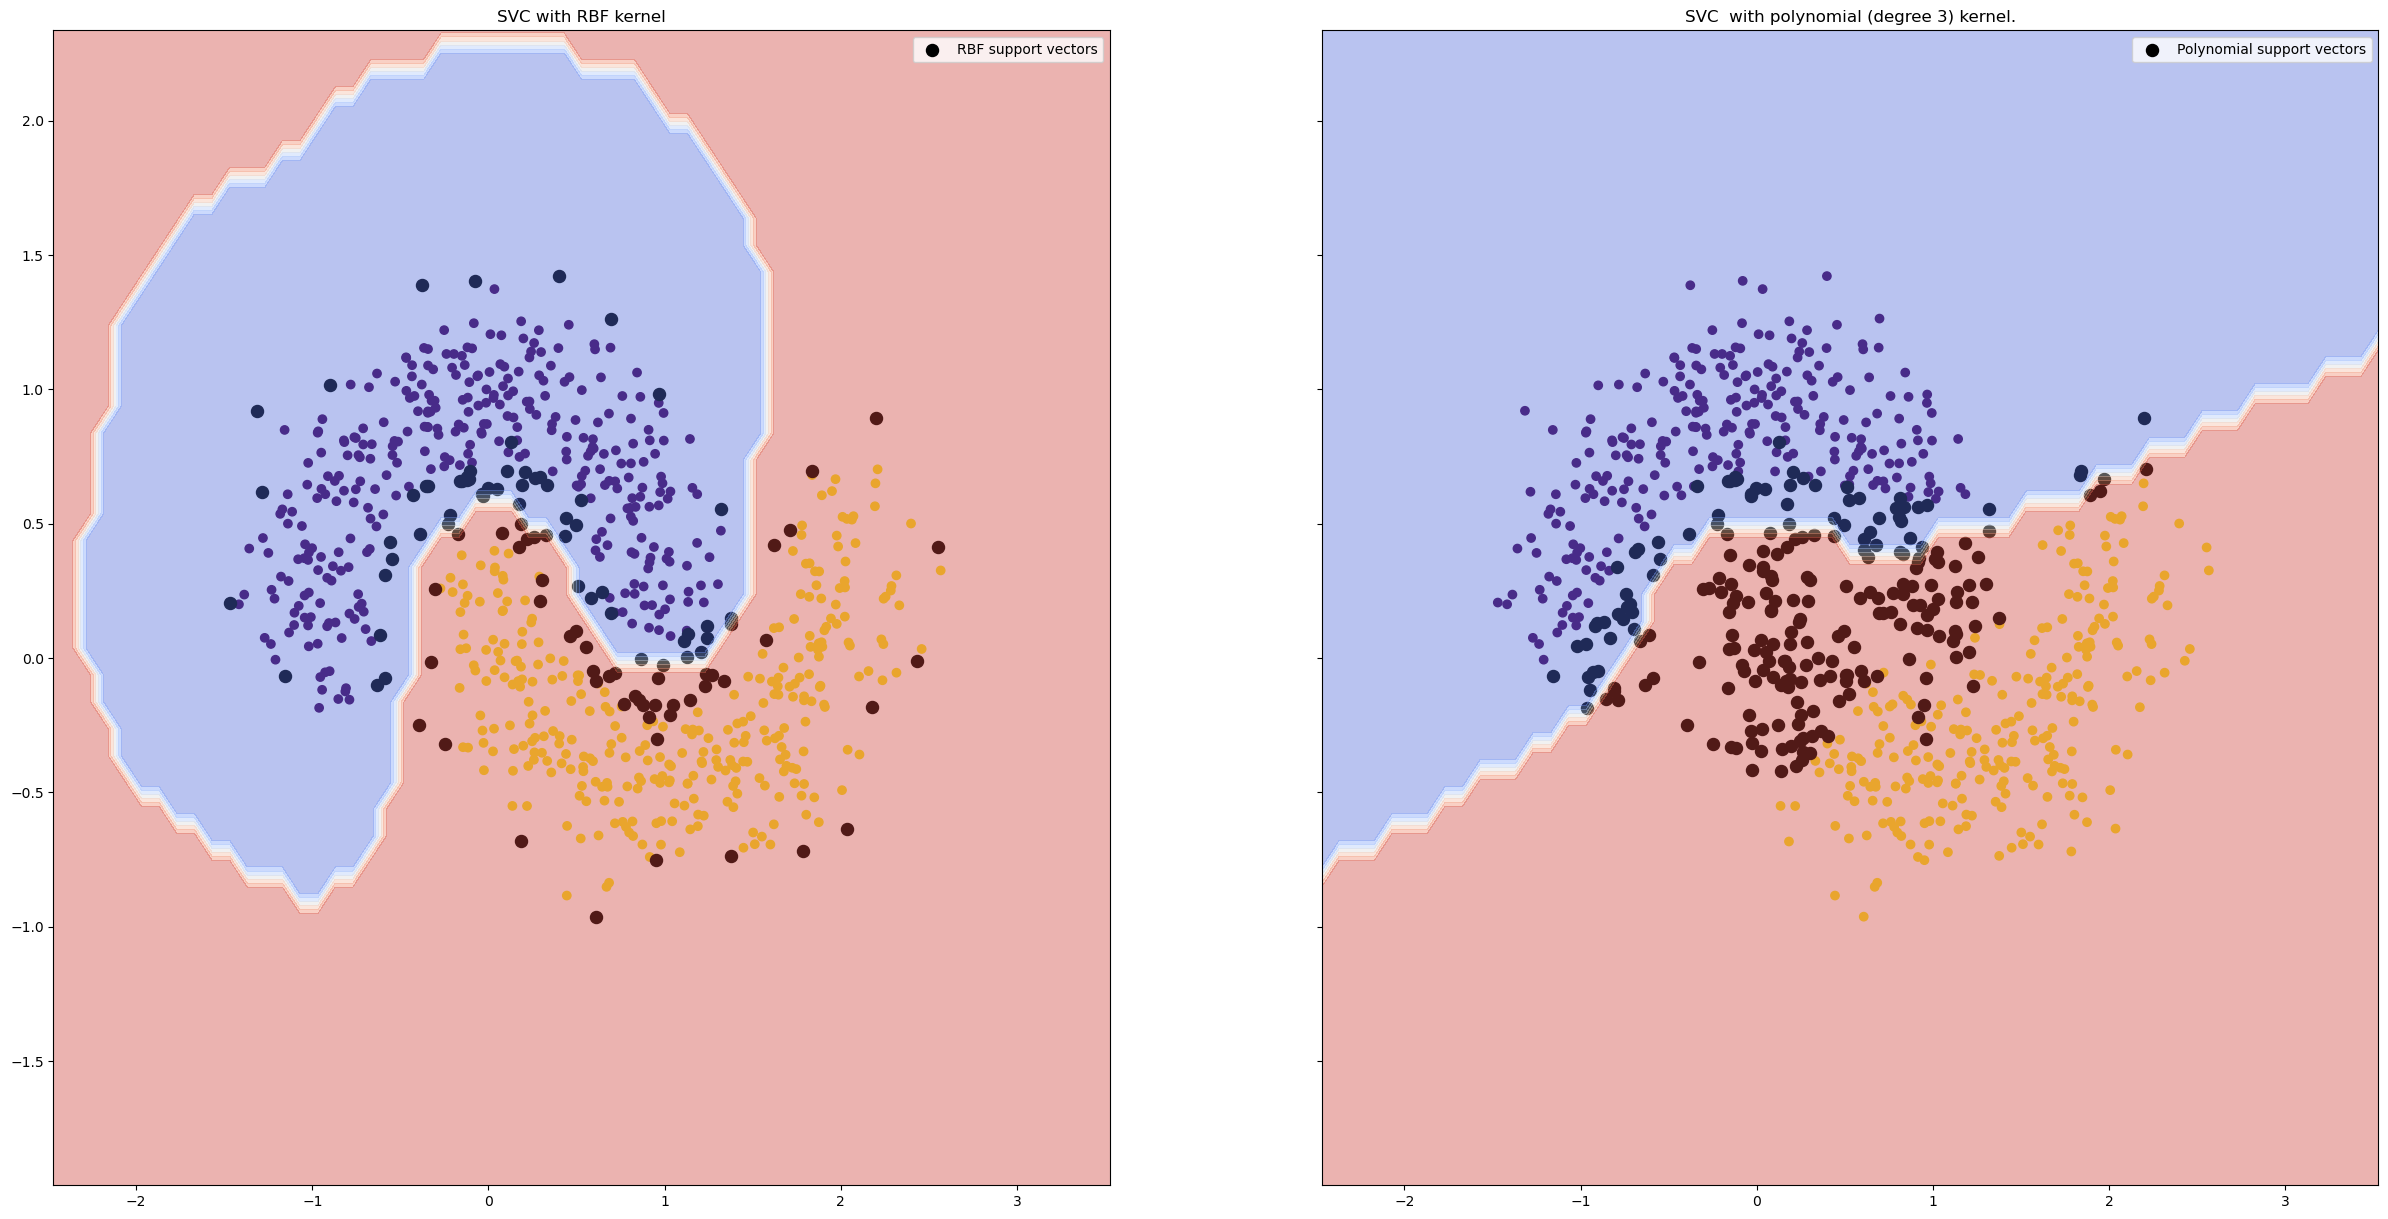

In [70]:

rbf_svc = svm.SVC(kernel='rbf', gamma=5, C=1).fit(X1_train, y1_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=5).fit(X1_train, y1_train)
lin_svc = svm.LinearSVC(C=1).fit(X1_train, y1_train)

titles1 = [ 'SVC with RBF kernel', 'SVC  with polynomial (degree 3) kernel.']
kernels = ['RBF', 'Polynomial']
xx, yy = np.meshgrid(np.arange(X1_train[:,0].min()-1, X1_train[:,0].max()+1, 0.1), np.arange(X1_train[:,1].min()-1, X1_train[:,1].max()+1, 0.1))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 15), sharey=True)
for i, clf in enumerate((rbf_svc, poly_svc)):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axes[i].scatter(X1_train[:,0], X1_train[:,1],c = y1_train, marker='o')
    axes[i].scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], 
                s=75, edgecolor='k', facecolor='k', label='{} support vectors'.format(kernels[i]))
    axes[i].contourf(xx,yy,Z, cmap=plt.cm.coolwarm, alpha=0.4)
    axes[i].legend()
    axes[i].set_title(titles1[i])

plt.show()

<Axes: >

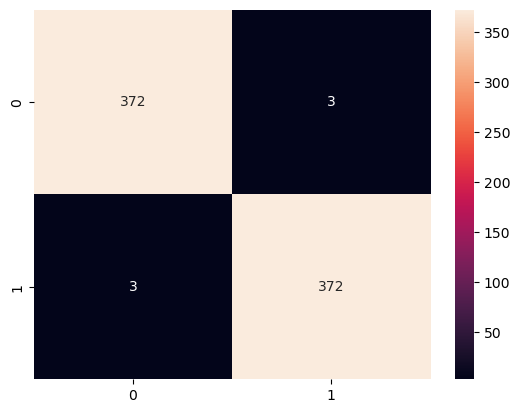

In [ ]:
#Performance of the SVM with RBF kernel.

from sklearn.calibration import cross_val_predict

y_train_pred = cross_val_predict(rbf_svc, X_train, y_train, cv=3)
cm1 = metrics.confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm1, annot=True, fmt='.0f')

### Multilabel Classification

A benefit of SVM's is that they natively support multilabel classification. We can see this with the iris dataset.

C:\Users\adam\AppData\Local\Temp\ipykernel_15916\1697198871.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


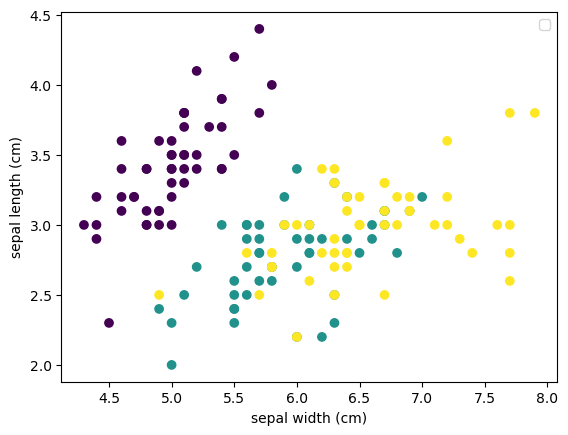

In [ ]:

from sklearn.datasets import load_iris
import numpy as np


iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df['target'] = iris.target
X2 = df.iloc[:,:2].to_numpy()
y2=df.iloc[:,5].to_numpy()



plt.scatter(X2[:,0],X2[:,1],c=y2)
plt.xlabel('sepal width (cm)')
plt.ylabel('sepal length (cm)')
plt.legend()
plt.show()

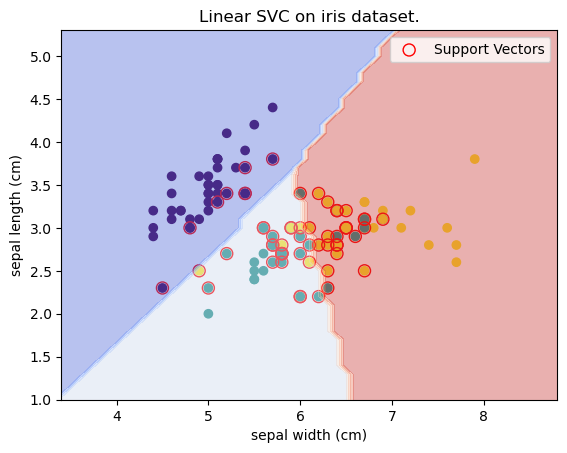

In [55]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2)
lin_svc = svm.SVC(kernel='linear',gamma=1,C=1).fit(X2_train,y2_train)


xx, yy = np.meshgrid(np.arange(X2_train[:,0].min()-1, X2_train[:,0].max()+1, 0.1), np.arange(X2_train[:,1].min()-1, X2_train[:,1].max()+1, 0.1))
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X2_train[:,0], X2_train[:,1],c = y2_train, marker='o')
plt.scatter(lin_svc.support_vectors_[:,0], lin_svc.support_vectors_[:,1], s=75,facecolor ='none', edgecolor = 'r', label = 'Support Vectors')
plt.contourf(xx,yy,Z, cmap=plt.cm.coolwarm, alpha=0.4)
plt.title('Linear SVC on iris dataset.')
plt.legend()
plt.xlabel('sepal width (cm)')
plt.ylabel('sepal length (cm)')
plt.show()

In [56]:
#Hyperparameter tuning.

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel':['rbf','linear','poly']}
base_estimator = svm.SVC()
grid_search_cv = GridSearchCV(base_estimator, param_grid, verbose=1, cv=3)
grid_search_cv.fit(X2_train, y2_train)

print(grid_search_cv.best_estimator_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
SVC(C=10, gamma=0.01)


<Axes: >

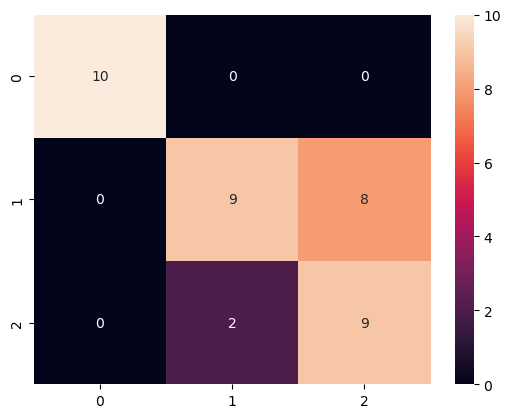

In [57]:
#Confusion matrix for the above Linear SVC.

y2_train_pred = lin_svc.predict(X2_test)
y2_cm = metrics.confusion_matrix(y2_test, y2_train_pred)
sns.heatmap(y2_cm, annot=True, fmt='.0f')

In [58]:
print(metrics.classification_report(y2_test, y2_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.53      0.64        17
           2       0.53      0.82      0.64        11

    accuracy                           0.74        38
   macro avg       0.78      0.78      0.76        38
weighted avg       0.78      0.74      0.74        38



### Support Vector Regression

The way to use SVMs for regression, linear or nonlinear, is to reverse the objective. Instead of trying to fit the maximum hyperplane between two classes while limiting margin violations, SVM regression tries to ft as many instances as possible on the street while limiting margin violations - the width of the street is controlled by a hyperparameter, $\varepsilon$.

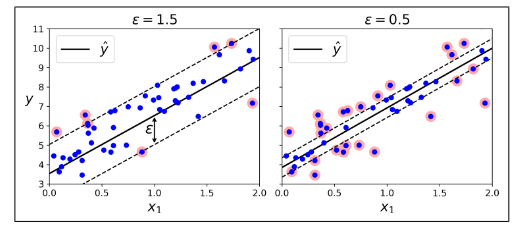 [1]

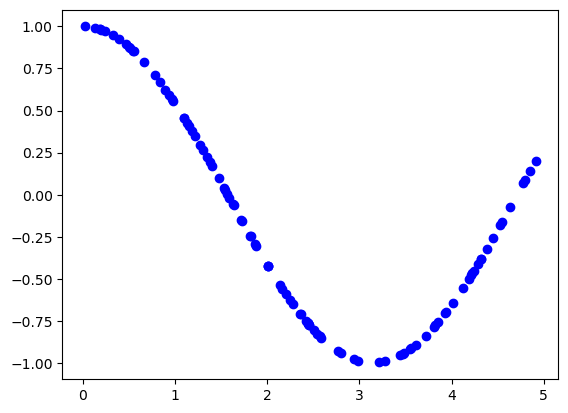

In [59]:
#Generate data for regression - with some noise.

X3 = np.sort(5* np.random.rand(100, 1), axis=0)
y3 = np.cos(X3).ravel()
plt.scatter(X3, y3, c='b')


In [60]:
#Define and train SVM's for regression on the generated dataset X3, y3

svr_rbf = svm.SVR(kernel='rbf',C=100,gamma=0.1,epsilon=0.1).fit(X3,y3)
svr_lin= svm.SVR(kernel='linear', C=100, gamma='auto').fit(X3,y3)
svr_poly = svm.SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=0.1, coef0=1).fit(X3,y3)

svrs = [svr_rbf, svr_lin, svr_poly]
print(list(enumerate(svrs)))

[(0, SVR(C=100, gamma=0.1)), (1, SVR(C=100, gamma='auto', kernel='linear')), (2, SVR(C=100, coef0=1, gamma='auto', kernel='poly'))]


Text(0.5, 0.98, 'Support Vector Regression Models')

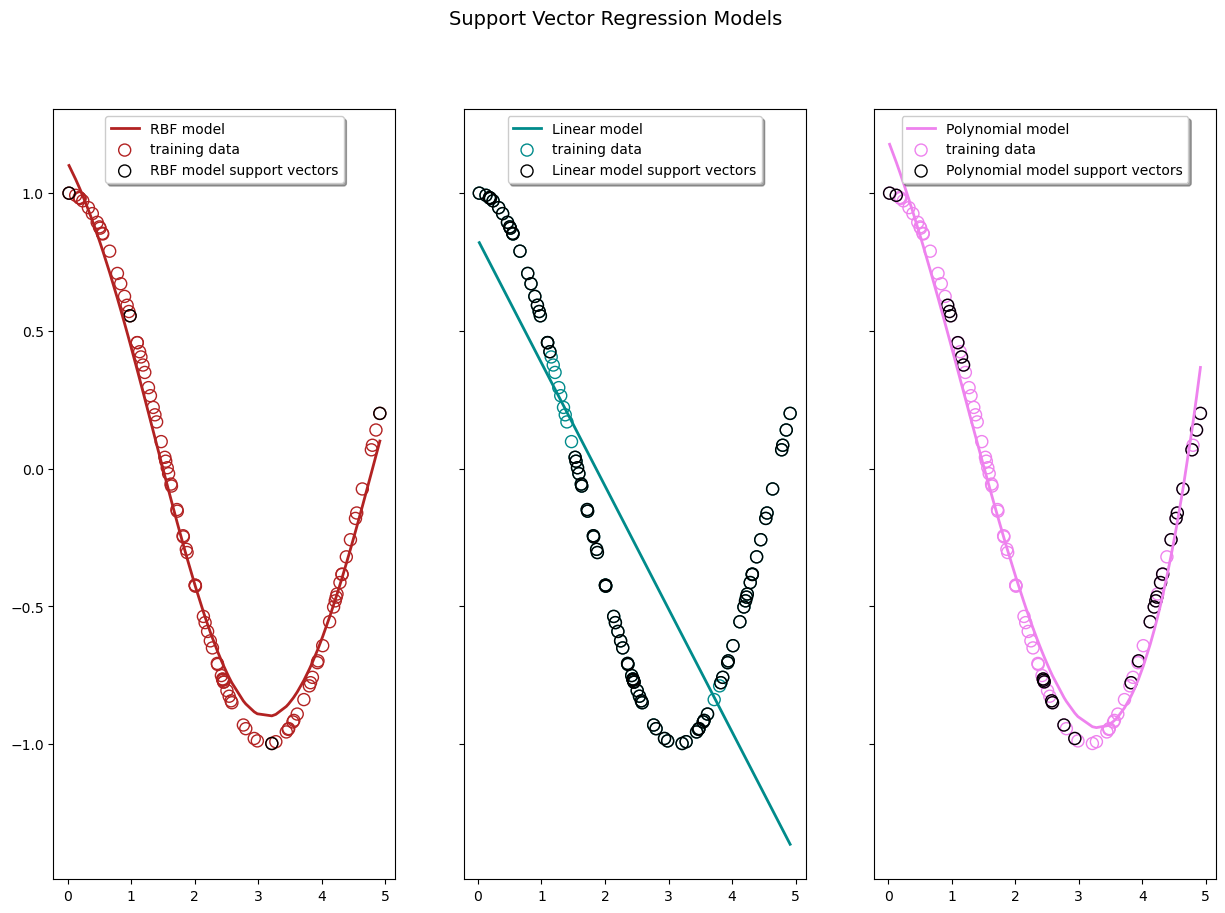

In [61]:
#Plotting results of the various SVM's.

kernel_label  = ["RBF", "Linear", "Polynomial"]
model_color = ["firebrick", "darkcyan", "violet"]
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,10), sharey=True)
for i, svr in enumerate(svrs):
    axes[i].plot(
        X3, svr.predict(X3),
        lw = 2,
        label = "{} model".format(kernel_label[i]),
        c = model_color[i]
    )
    axes[i].scatter(
        X3, y3, facecolor="none", edgecolor = model_color[i], s=75,
        label = "training data"
    )
    axes[i].scatter(
        X3[svr.support_], y3[svr.support_], s=75, facecolor = "none", edgecolor = 'k',
        label = "{} model support vectors".format(kernel_label[i]),
    )
    axes[i].legend(
        loc = 'upper center',
        fancybox= True,
        shadow = True
    )

fig.suptitle("Support Vector Regression Models", fontsize=14)

### Improving SVM Models

One way to improve SVM performance is hyperparameter tuning. Each SVM comes with certain hyperparameters that affect the way they perform. One that we've met already is the kernel. Another that is applicable to all SVM's is the value of c - the amount of margin violations we allow. For support vector regreesion, we consider how wide we want our "street" to be - this epsilon is another hyperparameter. Sci-kit learn comes with built in functions that allow for optimisation of hyperparameters, such as GridSearchCV, which was seen before - it performs an exhaustive search through a set of hyperparameters that you decide and returns the optimal model. Moreover, we can use any function we like as a kernel, as long as it can expressed as an inner product in another space. 

### A disadvantage: Computational Complexity

The main issue with SVM's is that they simply take a long time to train. To illustrate, suppose an oracle reveals to you which points are the optimal support vectors and which aren't. Suppose we have $R$ support vectors, finding the coefficients of the hyperplane then amounts to solving a linear system of $R$ equations, and this is well known to require a number of operations proportional to $R^3$. The number of support vectors grows linearly with the number of examples, so when the number of datapoints is large, the minimisation problem has computational complexity at least $O(n^3)$

### Conclusions:

SVM's are hugely applicable, we have seen here that they can be used for both classification and regression, but there is also a reformulation that is used for outlier detection, for example. Moreover, they can be tuned very finely, as you can choose your own kernel, for example, and each kernel has a large amount of hyperparameters. Moreover, they perform very well on small datasets, however they take a long time to train on large datasets. (Training an SVM on the aforementioned MNIST dataset took well over 30minutes). So, to conclude, SVM's are a very powerful, very precise tool, useful mainly in stuations where you have a small to medium-sized dataset. 



### References 

[1] Aurelien Geron. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. 2nd. O’Reilly Media, Inc., 2019. isbn: 1492032646.

[2] Ashwin Pajankar and Aditya Joshi. Hands-on Machine Learning with Python: Implement Neural Network Solutions with Scikit-learn and PyTorch. Apress Berkeley, CA, 2022. url: https://link.springer.com/book/10.1007/978-1-4842-7921-2.

[3] Léon Bottou, Chih-Jen Lin et al. 'Suppor vector machine solvers'. In: *Large scale kernel machines 3.1 (2007)*, pp. 301-320.